<a href="https://colab.research.google.com/github/piervecchi/sonar_dataset/blob/main/Vecchi_sonar_dataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

Data Collection and Data Processing

In [ ]:
#loading the dataset to a pandas Dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data'

data = pd.read_csv(url, header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
#number of rows and columns
data.shape

(208, 61)

60
M    111
R     97
dtype: int64


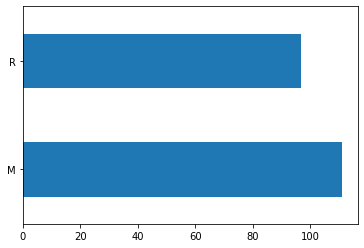

In [ ]:
data[60].value_counts().plot(kind='barh')
class_counts = data.groupby(data[60]).size()
print(class_counts)

M --> Mine
R --> Rock

In [ ]:
data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,0.289581,0.301459,0.314426,0.320692,0.331182,0.380999,0.415007,0.455882,0.538062,0.617941,0.667426,0.672325,0.676701,0.689165,0.681204,0.706075,0.714754,0.712269,0.650283,0.581796,0.482378,0.428049,0.396577,0.36614,0.337553,0.318553,0.317034,0.331608,0.336365,0.305221,0.292594,0.300975,0.276883,0.248106,0.245225,0.198804,0.146917,0.110594,0.063708,0.022721,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,0.174713,0.191589,0.226249,0.268963,0.307636,0.375611,0.417100,0.448240,0.466762,0.500229,0.542270,0.569290,0.612959,0.653761,0.668809,0.692762,0.687737,0.673145,0.632680,0.579934,0.529762,0.451619,0.440841,0.44568,0.455530,0.460710,0.417330,0.348868,0.313709,0.318057,0.285428,0.252338,0.211822,0.175132,0.142312,0.116949,0.094458,0.069488,0.038449,0.017796,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
#separating data and labels
X = data.drop(columns=60, axis=1)
Y = data[60]

In [ ]:
print(X)
print(Y)

         0       1       2       3   ...      56      57      58      59
0    0.0200  0.0371  0.0428  0.0207  ...  0.0180  0.0084  0.0090  0.0032
1    0.0453  0.0523  0.0843  0.0689  ...  0.0140  0.0049  0.0052  0.0044
2    0.0262  0.0582  0.1099  0.1083  ...  0.0316  0.0164  0.0095  0.0078
3    0.0100  0.0171  0.0623  0.0205  ...  0.0050  0.0044  0.0040  0.0117
4    0.0762  0.0666  0.0481  0.0394  ...  0.0072  0.0048  0.0107  0.0094
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
203  0.0187  0.0346  0.0168  0.0177  ...  0.0065  0.0115  0.0193  0.0157
204  0.0323  0.0101  0.0298  0.0564  ...  0.0034  0.0032  0.0062  0.0067
205  0.0522  0.0437  0.0180  0.0292  ...  0.0140  0.0138  0.0077  0.0031
206  0.0303  0.0353  0.0490  0.0608  ...  0.0034  0.0079  0.0036  0.0048
207  0.0260  0.0363  0.0136  0.0272  ...  0.0040  0.0036  0.0061  0.0115

[208 rows x 60 columns]
0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M


In [ ]:
#now I get the dummy data for the last column and put it in the dataframe Y
#The output variable is a string “M” for mine and “R” for rock, which is converted to integers 1 and 0.
Y = pd.get_dummies(data[60])
Y

,M,R
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
203,1,0
204,1,0
205,1,0
206,1,0


In [ ]:
#The values 1 and 0 in these columns stand for "belongs to" and "does not belong to"
#I split the object in two, so I will be able to test the classification results for both series
rock = Y['R']
mine = Y['M']

Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, mine, test_size = 0.3, stratify = Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(208, 60) (145, 60) (63, 60)


In [ ]:
print(X_train)
print(Y_train)

         0       1       2       3   ...      56      57      58      59
115  0.0414  0.0436  0.0447  0.0844  ...  0.0141  0.0077  0.0246  0.0198
86   0.0188  0.0370  0.0953  0.0824  ...  0.0090  0.0057  0.0068  0.0024
25   0.0201  0.0026  0.0138  0.0062  ...  0.0007  0.0024  0.0057  0.0044
11   0.0123  0.0309  0.0169  0.0313  ...  0.0026  0.0092  0.0009  0.0044
167  0.0137  0.0297  0.0116  0.0082  ...  0.0067  0.0035  0.0043  0.0033
..      ...     ...     ...     ...  ...     ...     ...     ...     ...
207  0.0260  0.0363  0.0136  0.0272  ...  0.0040  0.0036  0.0061  0.0115
132  0.0968  0.0821  0.0629  0.0608  ...  0.0126  0.0201  0.0210  0.0041
185  0.0340  0.0625  0.0381  0.0257  ...  0.0057  0.0051  0.0033  0.0058
2    0.0262  0.0582  0.1099  0.1083  ...  0.0316  0.0164  0.0095  0.0078
103  0.0162  0.0253  0.0262  0.0386  ...  0.0035  0.0100  0.0048  0.0019

[145 rows x 60 columns]
115    1
86     0
25     0
11     0
167    1
      ..
207    1
132    1
185    1
2      0
103    1


Model Training --> Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
#Training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Evaluation

In [ ]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on training data : ', training_data_accuracy)

In [ ]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on test data : ', test_data_accuracy)

[[21  8]
 [ 4 30]]
Test results: confusion matrix
[[21  8]
 [ 4 30]]


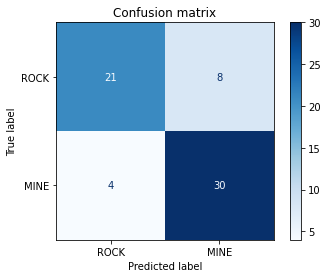

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, X_test_prediction))

disp = plot_confusion_matrix(model, X_test, Y_test,
                             display_labels=['ROCK','MINE'],
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Confusion matrix')

print('Test results: confusion matrix')
print(disp.confusion_matrix)

Precision and Recall

(0.0, 1.0)

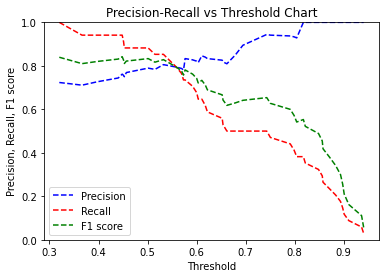

In [ ]:
# Predict test_y values and probabilities based on fitted logistic regression model

pred_y=model.predict(X_test) 

probs_y=model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(Y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = auc(recall, precision)
F1_score = 2*recall*precision/(recall+precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.plot(thresholds, F1_score[: -1], "g--", label="F1 score")
plt.ylabel("Precision, Recall, F1 score")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

The standard 0.5 threshold is good enough in this case.

In [ ]:
TN = confusion_matrix(Y_test, X_test_prediction)[0,0]
FP = confusion_matrix(Y_test, X_test_prediction)[0,1]
FN = confusion_matrix(Y_test, X_test_prediction)[1,0]
TP = confusion_matrix(Y_test, X_test_prediction)[1,1]

precision = TP/(TP+FP)
recall = TP/(TP+FN)

print('Precision : ', precision)
print('Recall : ', recall)

F1_score = 2*(precision*recall)/(precision+recall)
print('F1 score : ', F1_score)

Precision :  0.7894736842105263
Recall :  0.8823529411764706
F1 score :  0.8333333333333333


ROC Curve

roc_auc_score for Logistic Regression:  0.8772819472616633


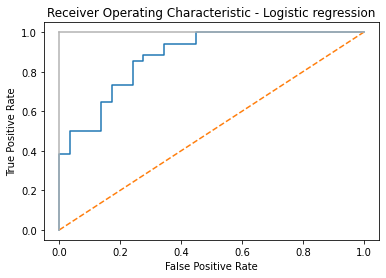

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
probs_y = model.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test, probs_y)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(Y_test, probs_y))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Making a Predictive System

In [ ]:
#insert in input_data the 60 variables to predict if the output is Rock or Mine
input_data = (0.0238,0.0318,0.0422,0.0399,0.0788,0.0766,0.0881,0.1143,0.1594,0.2048,0.2652,0.3100,0.2381,0.1918,0.1430,0.1735,0.1781,0.2852,0.5036,0.6166,0.7616,0.8125,0.7793,0.8788,0.8813,0.9470,1.0000,0.9739,0.8446,0.6151,0.4302,0.3165,0.2869,0.2017,0.1206,0.0271,0.0580,0.1262,0.1072,0.1082,0.0360,0.1197,0.2061,0.2054,0.1878,0.2047,0.1716,0.1069,0.0477,0.0170,0.0186,0.0096,0.0071,0.0084,0.0038,0.0026,0.0028,0.0013,0.0035,0.0060)

#changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]=='R'):
  print('The object is a Rock')
else:
  print('The object is a Mine')

['M']
The object is a Mine
